# Operator overloading in python

In [13]:
class Planet:
    def __init__(self, moons):
        self.moons = moons
    
    def __add__(self, newplanet):
        newmoons = self.moons + newplanet.moons
        return Planet(moons=newmoons)

In [14]:
p1 = Planet(['Gany', 'Titan'])
p2 = Planet(['phobo', 'dimo'])

In [15]:
p3 = p1+p2

In [16]:
p3.moons

['Gany', 'Titan', 'phobo', 'dimo']

# GPcore Tests

todo:
- movie save
- data save - python full wrapper
- growth rates
- ring potential - edge states (set V?)
- bdg
- timedependent v
- 

In [ ]:
from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
try:
    restartkernel()
except:
    pass

In [1]:
# %load_ext autoreload
# %autoreload 2

import sys, os
sys.path.append(os.path.abspath('..'))

from condensate.core import gpcore
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm.notebook import tqdm
import time
import h5py
import pandas as pd
from scipy.ndimage import rotate as rotate_image

In [2]:

omega = 10.

hbar = 1.05e-34
omegaz = 10
mass = 3.8e-26
a0 = 5.3e-11
a_s = 100*a0
N = 2e6
g = N* 4 * np.pi * (hbar**2) * (a_s  / mass)
g *= np.sqrt(mass * omegaz / (2*np.pi*hbar))

Rxy = np.sqrt(15 * N * a_s * np.sqrt(mass * omegaz / hbar))
a_h = np.sqrt(hbar / (2*mass *omega))
lb = np.sqrt(hbar / (mass *omega))
fov = 7 * Rxy * a_h
fov = 400 * 1e-6

In [3]:
DIM = 512
x = (1+0.j)*np.zeros((DIM,DIM))
V = np.zeros((DIM,DIM))
width = 10
for i in range(DIM):
    for j in range(DIM):
        x[i,j] = np.exp(-( (i-DIM//2)/width)** 2.  -  ((j-DIM//2)/width)** 2. ) + 1.j
        

gpcore.Setup(DIM, fov, g, 2e-3,  True, 0.001)

gpcore.SetHarmonicPotential(omega,0.0) #omega, epsilon
gpcore.GetPotential(V)

# plt.contour(V)
# plt.gca().set_aspect('equal', 'box')
# plt.show()

gpcore.Evolve(x,1000,40, True, 5e7)

xrelax = x.copy()

# mouse tests

In [ ]:

# omega = 10.

# hbar = 1.05e-34
# omegaz = 10
# mass = 3.8e-26
# a0 = 5.3e-11
# a_s = 100*a0
# N = 2e6
# g = N* 4 * np.pi * (hbar**2) * (a_s  / mass)
# g *= np.sqrt(mass * omegaz / (2*np.pi*hbar))

# Rxy = np.sqrt(15 * N * a_s * np.sqrt(mass * omegaz / hbar))
# a_h = np.sqrt(hbar / (2*mass *omega))
# lb = np.sqrt(hbar / (mass *omega))
# fov = 7 * Rxy * a_h
# fov = 400 * 1e-6

# DIM = 512
# x = (1+0.j)*np.zeros((DIM,DIM))
# V = np.zeros((DIM,DIM))
# width = 10
# for i in range(DIM):
#     for j in range(DIM):
#         x[i,j] = np.exp(-( (i-DIM//2)/width)** 2.  -  ((j-DIM//2)/width)** 2. ) + 1.j
        

# gpcore.Setup(DIM, fov, g, 2e-3,  True, 0.001)
# gpcore.SetHarmonicPotential(omega,0.0) #omega, epsilon
# gpcore.Evolve(x,1000,40, True, 5e7)


gpcore.Setup(DIM, fov, g, 1e-4,  False, 0.01)
gpcore.SetHarmonicPotential(omega,0.0) #omega, epsilon
gpcore.SetupSpoon(1e5, 20e-6)
# gpcore.SetupLeapMotion(-250,500,1,1, False)
gpcore.RotatingFrame(Omega)

gpcore.Evolve(x,0,40, True, 1e7)

# 1D rotini

In [165]:

omega = 2*np.pi*10

hbar = 1.05e-34
omegaz = np.sqrt(8) * omega
mass = 3.8e-26
a0 = 5.3e-11
a_s = 100*a0
N = 1e6
g = N* 4 * np.pi * (hbar**2) * (a_s  / mass)
g *= np.sqrt(mass * omegaz / (2*np.pi*hbar))

Rxy = np.sqrt(15 * N * a_s * np.sqrt(mass * omegaz / hbar))
lb = np.sqrt(hbar / (2*mass *omega))

fov = 300 * 1e-6

DIM = 512
x = (1+0.j)*np.zeros((DIM,DIM))
noise = (0.j)*np.zeros((DIM,DIM))
V = np.zeros((DIM,DIM))
width = 10
for i in range(DIM):
    for j in range(DIM):
        x[i,j] = np.exp(-( (i-DIM//2)/width)** 2.  -  ((j-DIM//2)/width)** 2. ) + 1.j
        noise[i,j]= np.exp(0.2 * 1.j * 2*np.pi * (0.5-np.random.rand()))
        

gpcore.Setup(DIM, fov, g, 1e-5,  True, 0)
gpcore.SetHarmonicPotential(omega,0.4) #omega, epsilon
gpcore.Evolve(x,10000,100, True, 3e8)
xrelax = x.copy()

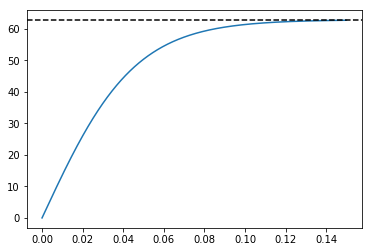

In [172]:
whirrMax = omega

steps = 30000
times = np.arange(steps)
whirrtime = 30000

# Omega = whirrMax* np.ones(steps)
Omega = [np.min([whirrMax, omega * 1.001 * np.tanh(3.3 * t / whirrtime)]) for t in times]

# Omega = [np.min([whirrMax, omega * 1.02 * np.tanh(2.4 * t / whirrtime)]) for t in times]

plt.plot(5e-6*times, Omega)
plt.axhline(Omega[-1],ls='--',c='k')

In [173]:
Omega[-1] - whirrMax

-0.10809306368710736

In [174]:
x = xrelax.copy()
gpcore.Setup(DIM, fov, g, 1e-5, False, 0.00)

gpcore.SetHarmonicPotential(omega,0.4) #omega, epsilon
gpcore.RotatingFrame(Omega)
gpcore.AbsorbingBoundaryConditions(1,150e-6)

gpcore.Evolve(x, steps, 50, True, 1e8)

xwide = x.copy()

In [180]:
xstart = xwide.copy()
gpcore.Setup(DIM, fov, g, 1e-5, False, 0.00)
steps = 40000
Omega = 1.0*whirrMax* np.ones(steps)
gpcore.SetHarmonicPotential(omega,0.4) #omega, epsilon
gpcore.RotatingFrame(Omega)
gpcore.AbsorbingBoundaryConditions(1,150e-6)

gpcore.Evolve(xstart, steps, 50, True, 4e6)

xthin = xstart.copy()

In [101]:
xstart = xthin.copy()
gpcore.Setup(DIM, fov, g, 1e-5, False, 0.00)
steps = 60000
Omega = 1.0*whirrMax* np.ones(steps)
gpcore.SetHarmonicPotential(omega,0.4) #omega, epsilon
gpcore.RotatingFrame(Omega)
gpcore.AbsorbingBoundaryConditions(1,150e-6)

gpcore.Evolve(xstart, steps, 50, True, 4e4)

xthinthin = xstart.copy()

In [176]:
noise = (0.j)*np.zeros((DIM,DIM))
for i in range(DIM):
    for j in range(DIM):
        noise[i,j]= np.exp(0.1 * 1.j * 2*np.pi * (0.5-np.random.rand()))

In [177]:
np.max(np.abs(xthinthin)**2)

2830.4109301949247

In [184]:
# xstart = xwide.copy() * noise
# xstart = xthin.copy()* noise
gpcore.Setup(DIM, fov, g, 1e-5, False, 0.00)
steps = 200000
Omega = whirrMax* np.ones(steps)
gpcore.SetHarmonicPotential(omega,0) #omega, epsilon
gpcore.RotatingFrame(Omega)
# gpcore.AbsorbingBoundaryConditions(1,150e-6)

gpcore.Evolve(xstart, steps, 50, True, 2e6)

# 1D growths - vary waittime

In [210]:
def compute_rotini(stripPsi, stripsteps, rotinisteps=250000, show=True, frames=50, datafile='data/rotinigrowth.hdf5'):
    steps = frames*(rotinisteps//frames)
    runtime = steps//frames
    times = np.arange(steps)
    Omega = omega* np.ones(runtime)
    dt = 1e-5
    x = stripPsi.copy() * noise
    vmax = np.max(np.abs(x))**2
    out = []
    density = np.fliplr(np.abs(x.copy())**2)
    density *= density>1
    out.append(density)
    
    for i in tqdm(range(frames), leave=False):
        gpcore.Setup(DIM, fov, g, dt, False, 0.00)
        gpcore.SetHarmonicPotential(omega,0) #omega, epsilon
        gpcore.RotatingFrame(Omega)
        gpcore.Evolve(x, runtime , 50, show, vmax)
        
        density = np.fliplr(np.abs(x.copy())**2)
        density *= density>1
        out.append(density)
        
    with h5py.File(datafile, 'a') as f:
        dsname = f"rotini1D_{stripsteps}"
        dset = f.create_dataset(dsname, data=np.array(out))
        dset.attrs['stripsteps'] = stripsteps
        dset.attrs['time'] = dt*runtime * np.arange(frames)
        dset.attrs['dt'] = dt

In [212]:
stripstepslist = list(np.arange(2000,60000,4000)) 

In [215]:
stripstepslist

[2000,
 6000,
 10000,
 14000,
 18000,
 22000,
 26000,
 30000,
 34000,
 38000,
 42000,
 46000,
 50000,
 54000,
 58000]

In [ ]:
dt = 1e-5
runtime = 4000
Omega = omega * np.ones(runtime)
xstart = xwide.copy()
vmax = np.max(np.abs(xstart))**2

gpcore.Setup(DIM, fov, g, dt, False, 0.00)
gpcore.SetHarmonicPotential(omega,0.4) #omega, epsilon
gpcore.RotatingFrame(Omega)
gpcore.AbsorbingBoundaryConditions(1,150e-6)
gpcore.Evolve(xstart, 2000, 50, True, vmax)
compute_rotini(xstart, 2000)

for stripsteps in tqdm(stripstepslist[1:]):
    vmax = np.max(np.abs(xstart))**2
    gpcore.Setup(DIM, fov, g, dt, False, 0.00)
    gpcore.SetHarmonicPotential(omega,0.4) #omega, epsilon
    gpcore.RotatingFrame(Omega)
    gpcore.AbsorbingBoundaryConditions(1,150e-6)
    gpcore.Evolve(xstart, runtime, 50, True, vmax)
    compute_rotini(xstart, stripsteps)


# 1D growths - vary g


In [130]:
stepslist = np.arange(0,20000,1000)

In [131]:
stepslist

array([    0,  1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,
        9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000,
       18000, 19000])

In [152]:
glist = 9.275086005434142e-40 * np.array([0,0.0001, 0.001,0.01,0.02,0.03,0.04,0.05,0.1,1])

columns = ['g', 'steps', 'Psi']
results1d = pd.DataFrame(columns=columns)


for g in tqdm(glist):
    
    DIM = 512
    x = (1+0.j)*np.zeros((DIM,DIM))
    V = np.zeros((DIM,DIM))
    width = 10
    for i in range(DIM):
        for j in range(DIM):
            x[i,j] = np.exp(-( (i-DIM//2)/width)** 2.  -  ((j-DIM//2)/width)** 2. ) + 1.j


    gpcore.Setup(DIM, fov, g, 2e-3,  True, 0.001)

    gpcore.SetHarmonicPotential(omega,0.0) 

    gpcore.Evolve(x,1000,40, True, 3e8)
    
    whirrMax = omega

#     if g<0.03:
#         steps = 30000
#     else:
    steps = 30000
    whirrtime = 20000
    times = np.arange(steps)

    Omega = [np.min([whirrMax, omega * 1.02 * np.tanh(2.4 * t / whirrtime)]) for t in times]
    gpcore.Setup(DIM, fov, g, 2e-4, False, 0.000)
    gpcore.SetHarmonicPotential(omega,0.18) #omega, epsilon
    gpcore.RotatingFrame(Omega)
    gpcore.AbsorbingBoundaryConditions(1,600e-6)
    gpcore.Evolve(x, steps, 500, True, 1e8)
    
    for steps in tqdm(stepslist, leave=False):
        gpcore.Setup(DIM, fov, g, 1e-3, False, 0.00)
        Omega = whirrMax* np.ones(1000)
        gpcore.SetHarmonicPotential(omega,0) #omega, epsilon
        gpcore.RotatingFrame(Omega)
        gpcore.AbsorbingBoundaryConditions(1,600e-6)
        gpcore.Evolve(x, 1000, 50, True, 7e6)
        
        Psi = x.copy()
        newresults = pd.DataFrame([[g,steps,Psi]],columns=columns)
        results1d = results1d.append(newresults,  ignore_index=True)

In [138]:
ntest = np.abs(results1d.iloc[10].Psi)**2

In [139]:

view = 250

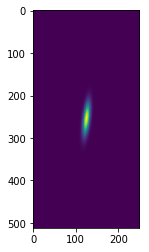

In [140]:
plt.imshow(rotate_image(ntest,-45, reshape=False)[: , 256-view//2 : 256+ view//2])

In [153]:
finalplot = []
view = 250
for i,r in results1d.iterrows():
    density = rotate_image(np.abs(r.Psi)**2,-45,reshape=False)[: , 256-view//2 : 256+ view//2]
    finalplot.append(density)

In [154]:
np.sum(alls[0,:,:,:])

6472691358159.912

In [155]:
alls = np.reshape(finalplot, [ len(glist),len(stepslist), 512, view])
last = np.vstack([np.hstack(alls[i,:,:,:]/np.sum(alls[i,:,:,:])) for i in range(len(glist))])

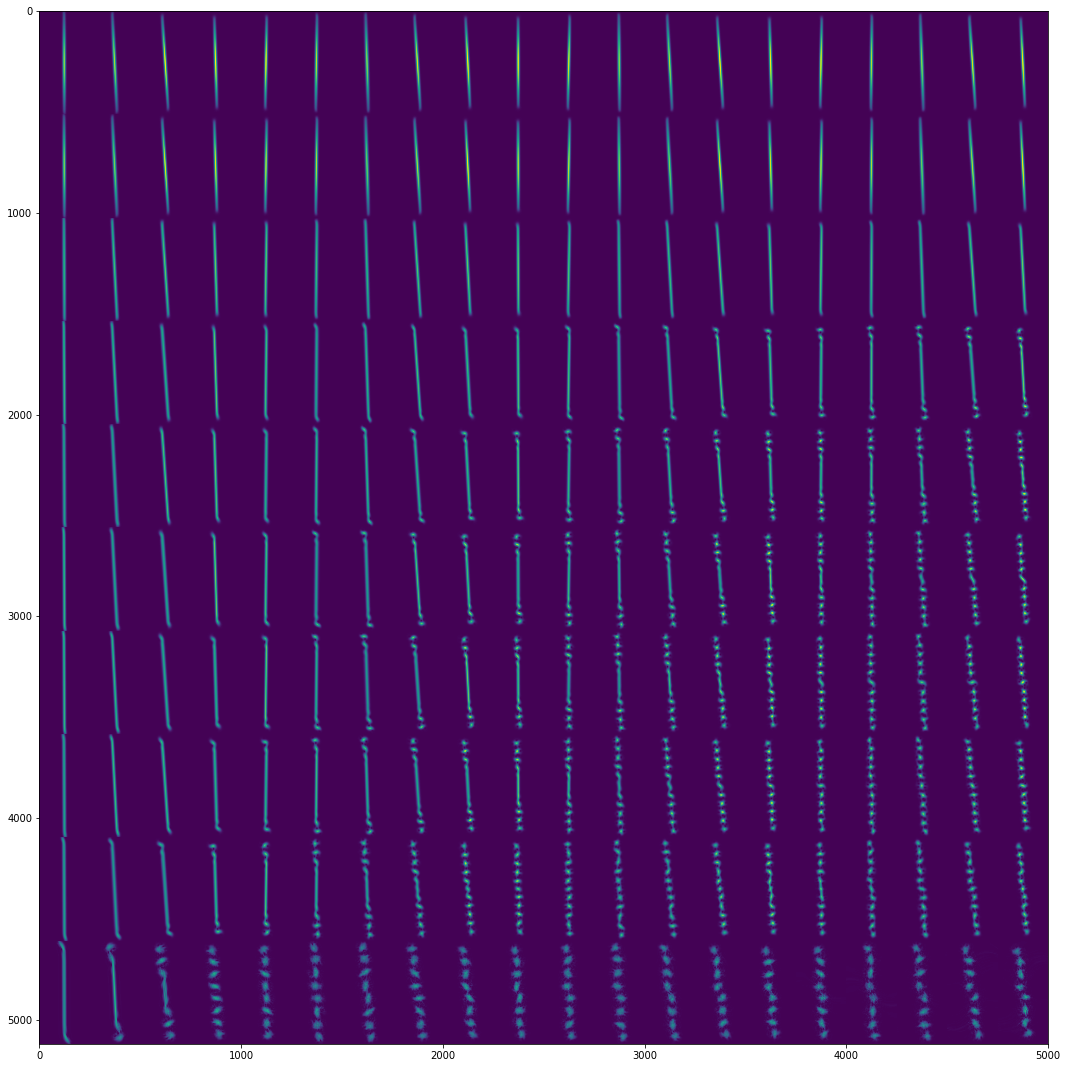

In [156]:
plt.figure(figsize=(19,19))
plt.imshow(last)
plt.savefig('./1dgrowths_2.png')

(-40, 40)

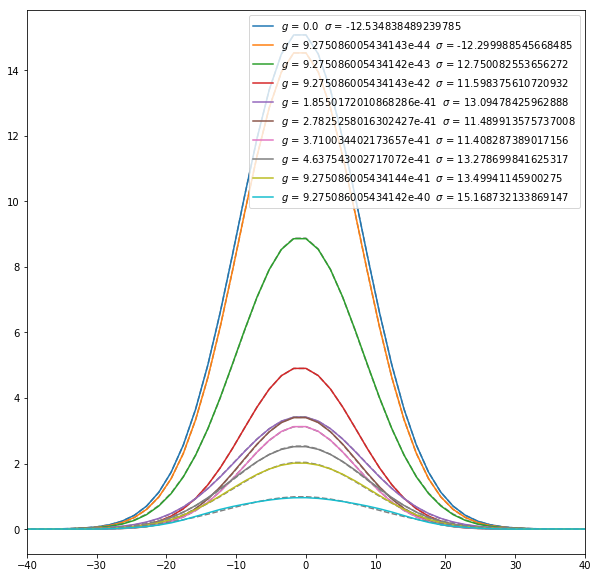

In [158]:
plt.figure(figsize=(10,10))
for i,r in results1d.iterrows():
    if r.steps==0:
        x = dx * np.arange(-view//2,view//2,1)
        density = rotate_image(np.abs(r.Psi)**2,-45,reshape=False)[256-view//2 : 256+ view//2 , 256-view//2 : 256+ view//2]
        f,_ = curve_fit(gauss, 1e6*x, 1e-9*np.sum(density, axis=0), [0,2,16])
        plt.plot(1e6*x,gauss(1e6*x,*f),'--', color='grey')
        plt.plot(1e6*x,1e-9*np.sum(density, axis=0), '-',label='$g$ = ' + str(r.g) + '  $\sigma$ = ' + str(f[2]))
        
plt.legend()
plt.xlim(-40 , 40)

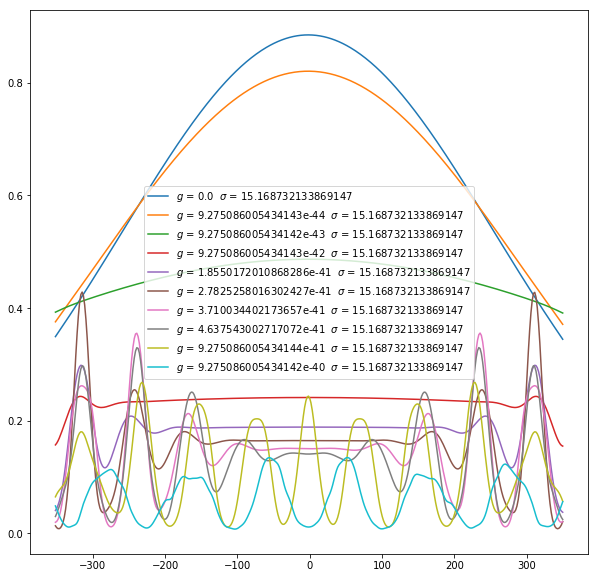

In [163]:
view=400
plt.figure(figsize=(10,10))
for i,r in results1d.iterrows():
    if r.steps==10000:
        x = dx * np.arange(-view//2,view//2,1)
        density = rotate_image(np.abs(r.Psi)**2,-45,reshape=False)[256-view//2 : 256+ view//2 , 256-view//2 : 256+ view//2]
        plt.plot(1e6*x,1e-9*np.sum(density, axis=1), '-',label='$g$ = ' + str(r.g) + '  $\sigma$ = ' + str(f[2]))
        
plt.legend()
# plt.xlim(-40 , 40)

In [89]:
def gauss(x,x0,a,s): return a*np.exp(- (x-x0) **2 / (s**2))

In [90]:
from scipy.optimize import curve_fit

In [93]:
f

array([-0.89377604,  0.55568644, 12.42994597])

In [91]:
f,_ = curve_fit(gauss, 1e6*x, 1e-9*np.sum(density, axis=0), [0,2,16])

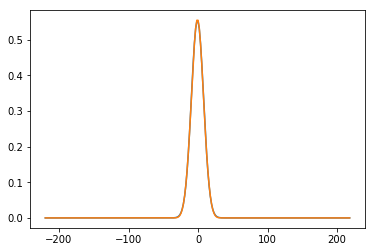

In [92]:
plt.plot(1e6*x,gauss(1e6*x,*f))
plt.plot(1e6*x, 1e-9*np.sum(density, axis=0))

In [76]:
lb*1e6

16.62274915510922

In [69]:
len(density)

250

In [62]:
dx = 900e-6 / 512

In [68]:
x

array([0.00000000e+00, 1.75781250e-06, 3.51562500e-06, ...,
       2.55999996e+02, 2.55999997e+02, 2.55999999e+02])

In [63]:
view

250

# 2D Rotini

In [9]:

omega = 2*np.pi*2

hbar = 1.05e-34
omegaz = 10
mass = 3.8e-26
a0 = 5.3e-11
a_s = 100*a0
N = 2e4
g = N* 4 * np.pi * (hbar**2) * (a_s  / mass)
g *= np.sqrt(mass * omegaz / (2*np.pi*hbar))

Rxy = np.sqrt(15 * N * a_s * np.sqrt(mass * omegaz / hbar))
a_h = np.sqrt(hbar / (2*mass *omega))
lb = np.sqrt(hbar / (mass *omega))
fov = 7 * Rxy * a_h
fov = 500 * 1e-6

DIM = 512
x = (1+0.j)*np.zeros((DIM,DIM))
V = np.zeros((DIM,DIM))
width = 10
for i in range(DIM):
    for j in range(DIM):
        x[i,j] = np.exp(-( (i-DIM//2)/width)** 2.  -  ((j-DIM//2)/width)** 2. ) + 1.j
        

gpcore.Setup(DIM, fov, g, 2e-3,  True, 0.001)

gpcore.SetHarmonicPotential(omega,0.0) #omega, epsilon
gpcore.GetPotential(V)

# plt.contour(V)
# plt.gca().set_aspect('equal', 'box')
# plt.show()

gpcore.Evolve(x,1000,40, True, 3e8)
xrelax=x.copy()

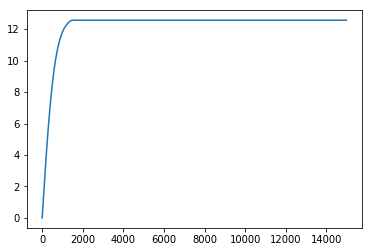

In [11]:
whirrMax = omega
# whirrMax = np.sqrt(1-0.16)*omega

steps = 15000
times = np.arange(steps)
whirrtime = 1500

# Omega = whirrMax* np.ones(steps)
Omega = [np.min([whirrMax, whirrMax * 1.02 * np.tanh(2.4 * t / whirrtime)]) for t in times]
# Omega = [np.max([whirrMax, 2*omega - (omega * 1.02 * np.tanh(2.4 * t / whirrtime)) ]) for t in times]

plt.plot(times, Omega)

In [14]:
x = xrelax.copy()
gpcore.Setup(DIM, fov, g, 1e-3, False, 0.001)

gpcore.SetHarmonicPotential(omega,0.2) #omega, epsilon
gpcore.RotatingFrame(Omega)
gpcore.AbsorbingBoundaryConditions(1,200e-6)

gpcore.Evolve(x, steps, 50, True, 0.6e8)

In [60]:
xstart = x.copy()
gpcore.Setup(DIM, fov, g, 1e-3, False, 0.005)

gpcore.SetHarmonicPotential(omega,0.16) #omega, epsilon
gpcore.RotatingFrame([whirrMax])
gpcore.AbsorbingBoundaryConditions(0,1000e-6)
gpcore.SetupSpoon(100, 1000e-6)

gpcore.Evolve(xstart, 0, 50, True, 0.6e8)

In [758]:
# # back to circ
# steps = 3500
# Omega = whirrMax* np.ones(steps)
# gpcore.Setup(DIM, fov, g, 1e-3, False, 0.0001)

# gpcore.SetHarmonicPotential(omega,0.0) #omega, epsilon
# gpcore.RotatingFrame(Omega)

# gpcore.Evolve(x, steps, 50, True, 1e8)

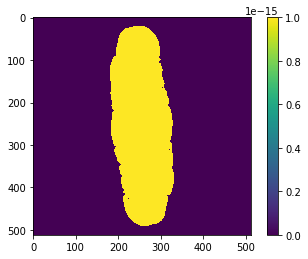

In [25]:
# plt.figure(figsize=(18,18))
plt.imshow(np.abs(x)**2* (np.abs(x)**2 >1), vmax=1e-15)
plt.colorbar()

plt.show()

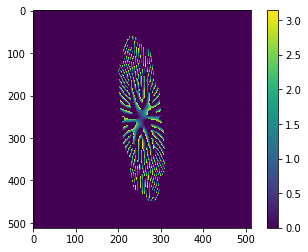

In [10]:
# plt.figure(figsize=(18,18))
plt.imshow(np.angle(x)* (np.abs(x)**2 >1e6), vmin=0)
plt.colorbar()

plt.show()

# epsilon-omega

In [8]:
view = 300

def compute_rotini(Omega=0.9, epsilon=0.16, steps=14000, show=True, frames=50, datafile='data/epsilonomega.hdf5', savetype='density'):
    steps = frames*(steps//frames)
    runtime = steps//frames
    times = np.arange(steps)
    whirrtime = 1500
    whirrMax = Omega*omega
    Omegalist = [np.min([whirrMax, omega * 1.02 * np.tanh(2.4 * t / whirrtime)]) for t in times]
    x = xrelax.copy()
    dt = 1e-3
    out = []
    
    for i in tqdm(range(frames), leave=False):
        gpcore.Setup(DIM, fov, g, dt, False, 0.007)
        gpcore.SetHarmonicPotential(omega,epsilon) #omega, epsilon
        gpcore.RotatingFrame(Omegalist[i*runtime : (i+1)*runtime])
        gpcore.AbsorbingBoundaryConditions(1,500e-6)
        gpcore.Evolve(x, runtime , 50, show, 0.3e8)
        if savetype=='density':
            density = np.fliplr(np.abs(x.copy())**2)
            density *= density>1
            out.append(density[256-view//2 : 256+ view//2, 256-view//2 : 256+ view//2])
        else:
            out.append(x.copy())
        
    with h5py.File(datafile, 'a') as f:
        dsname = f"rotini2D_{Omega}_{epsilon}"
        dset = f.create_dataset(dsname, data=np.array(out))
        dset.attrs['Omega'] = Omega
        dset.attrs['epsilon'] = epsilon
        dset.attrs['time'] = dt*runtime * np.arange(frames)
        
def plot_epsilon_omega(full, show=True, save=False, frame=0):
    plt.figure(figsize=(18,18))
    plt.imshow(full, cmap='inferno',origin='lower', vmax=7e7)
    for i in range(len(Omegalist)):
        plt.axvline(i*view, color='w', lw=0.5)
    for i in range(len(epsilonlist)):
        plt.axhline(i*view, color='w', lw=0.5)
    plt.xticks(np.arange(view//2, len(Omegalist)*view, view), Omegalist) 
    plt.yticks(np.arange(view//2, len(epsilonlist)*view, view), epsilonlist) 
    plt.gca().tick_params(labelsize=19)
    plt.xlabel('$\Omega/\omega$', size=23)
    plt.ylabel('$\epsilon$', size=23)
    plt.tight_layout()
    if save: plt.savefig(f"figures/epsilonomegamovie/epomega_{frame}.png", dpi=210)
    if show: plt.show()
    plt.close()

In [18]:
compute_rotini(frames=100, savetype='other')

In [7]:
Omegalist = [0.7,0.75,0.8, 0.85, 0.86,0.87, 0.88, 0.89, .9,0.91, .92, .94, .96, 1]
epsilonlist = [0.08,0.1,0.12,0.14,0.16,0.18,0.2,0.22,0.24]

In [8]:
# Run the entire simulation

for Omega in tqdm(Omegalist):
    for epsilon in tqdm(epsilonlist, leave=False):
        compute_rotini(Omega, epsilon)

In [ ]:
# process the data
for frame in tqdm(range(50)):
    columns = ['Omega', 'epsilon', 'density']
    results = pd.DataFrame(columns=columns)

    with h5py.File('data/epsilonomega.hdf5', 'r') as f:
        for name in f:
            dataset = f[name]
            density = dataset[frame]
            Omega = dataset.attrs["Omega"]
            epsilon = dataset.attrs["epsilon"]
            newresults = pd.DataFrame([[Omega,epsilon,density]],columns=columns)
            results = results.append(newresults,  ignore_index=True)

    results = results.sort_values(by=["Omega", "epsilon"], ignore_index=True)

    allimages = []
    for i,r in results.iterrows():
        allimages.append(r.density)

    reshaped = np.reshape(allimages, [len(Omegalist), len(epsilonlist), view, view])
    full = np.hstack([np.vstack(reshaped[i,:,:,:]) for i in range(len(Omegalist))])

    plot_epsilon_omega(full, show=False, save=True, frame=frame)

In [9]:
frame = 59
with h5py.File('data/movie_1.hdf5', 'r') as f:
    for name in f:
        print(name)
        dataset = f[name]
        density = dataset[frame]
        Omega = dataset.attrs["Omega"]
        epsilon = dataset.attrs["epsilon"]
        times = dataset.attrs['time']

rotini2D_0.9_0.16


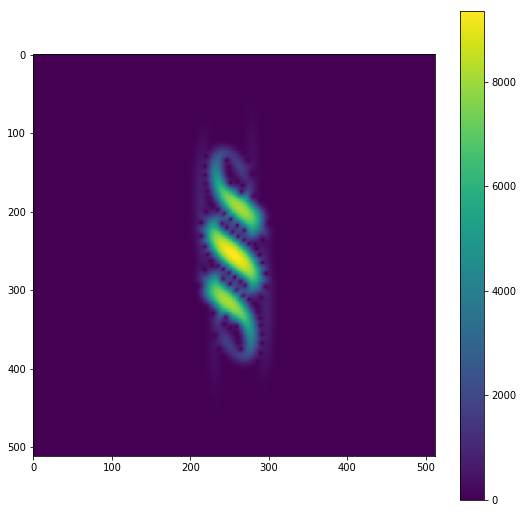

In [10]:
plt.figure(figsize=(9,9))
plt.imshow(np.abs(density))
plt.colorbar()

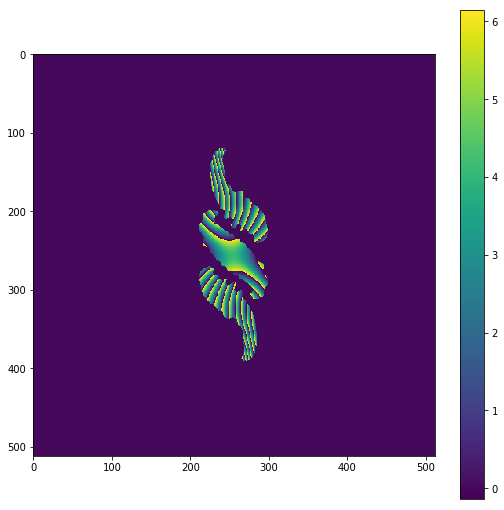

In [48]:
plt.figure(figsize=(9,9))
plt.imshow((3+np.angle(density))*(np.abs(density)>2e3))
plt.colorbar()

In [15]:
gpcore.Setup(DIM,g, 1e-3,  True, 0.001)
gpcore.SetHarmonicPotential(1,0) 
gpcore.Evolve(x,200,4, True)

gpcore.Setup(DIM,g, 1e-1,  False, 0.001)
gpcore.SetHarmonicPotential(1,0.4) 
gpcore.Evolve(x,9,4, True)

gpcore.Setup(DIM,g, 1e-3,  False, 0.003)
gpcore.SetHarmonicPotential(1,0) 
gpcore.Evolve(x,20000,50, True)

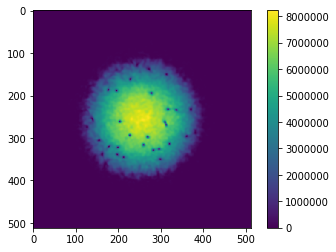

In [38]:
plt.imshow(np.abs(x)**2)
plt.colorbar()

plt.show()

In [39]:
xnew = x.copy()

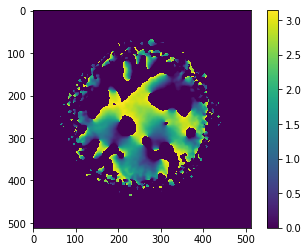

In [40]:
plt.imshow(np.angle(x)* (np.abs(x)**2 >1e4), vmin=0)
plt.colorbar()

plt.show()

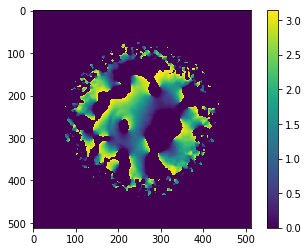

In [41]:
plt.imshow(np.angle(xold)* (np.abs(xold)**2 >1e4), vmin=0)
plt.colorbar()

plt.show()

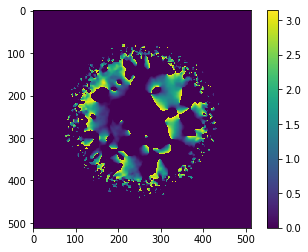

In [42]:
plt.imshow(np.angle(xold/xnew)* (np.abs(xold)**2 >1e4), vmin=0)
plt.colorbar()

plt.show()

In [7]:
dir(gpcore)

['Evolve',
 '__builtin__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_gpcore',
 '_newclass',
 '_object',
 '_swig_getattr',
 '_swig_property',
 '_swig_repr',
 '_swig_setattr',
 '_swig_setattr_nondynamic',
 'cvar',
 'getPotential',
 'setHarmonicPotential',
 'setup']

In [8]:
x = 500e-6
u = 1e-25 * (x**2)

In [10]:
u

2.4999999999999997e-36

# vortex lattice squeezing

In [170]:
omega = 4

hbar = 1.05e-34
omegaz = 10
mass = 3.8e-26
a0 = 5.3e-11
a_s = 100*a0
N = 1.5e6
g = N* 4 * np.pi * (hbar**2) * (a_s  / mass)
g *= np.sqrt(mass * omegaz / (2*np.pi*hbar))

Rxy = np.sqrt(15 * N * a_s * np.sqrt(mass * omegaz / hbar))
a_h = np.sqrt(hbar / (2*mass *omega))
lb = np.sqrt(hbar / (mass *omega))
fov = 7 * Rxy * a_h
fov = 1000 * 1e-6

DIM = 512
x = (1+0.j)*np.zeros((DIM,DIM))
V = np.zeros((DIM,DIM))
width = 10
for i in range(DIM):
    for j in range(DIM):
        phi = 10*np.arctan2((i-DIM//2), (j-DIM//2))
        phase = np.exp(1.j * np.mod(phi,2*np.pi))
        x[i,j] = np.exp(-( (i-DIM//2)/width)** 2.  -  ((j-DIM//2)/width)** 2. ) + 1.j
        x[i,j] *= phase
        

gpcore.Setup(DIM, fov, g, 5e-3,  True, 0.001)
gpcore.SetHarmonicPotential(omega,0.0) #omega, epsilon

steps = 10000
Omega = 0.75*omega* np.ones(steps)
gpcore.RotatingFrame(Omega)

# gpcore.GetPotential(V)
# plt.contour(V)
# plt.gca().set_aspect('equal', 'box')
# plt.show()

gpcore.Evolve(x,steps,40, True, 1e7)
xrelax=x.copy()

In [169]:

gpcore.Setup(DIM, fov, g, 1e-4,  False, 0.001)

gpcore.SetHarmonicPotential(omega,0.0) #omega, epsilon
gpcore.GetPotential(V)
steps = 20000
Omega = omega* np.ones(steps)
gpcore.SetHarmonicPotential(omega,0.2) #omega, epsilon
gpcore.RotatingFrame(Omega)
gpcore.AbsorbingBoundaryConditions(1,600e-6)

# plt.contour(V)
# plt.gca().set_aspect('equal', 'box')
# plt.show()

gpcore.Evolve(x,steps,40, True, 1e7)

# Datasets for superfluidGAN

In [195]:
omega = 2*np.pi

hbar = 1.05e-34
omegaz = 10
mass = 3.8e-26
a0 = 5.3e-11
a_s = 100*a0
N = 1.5e6
g = N* 4 * np.pi * (hbar**2) * (a_s  / mass)
g *= np.sqrt(mass * omegaz / (2*np.pi*hbar))

Rxy = np.sqrt(15 * N * a_s * np.sqrt(mass * omegaz / hbar))
a_h = np.sqrt(hbar / (2*mass *omega))
lb = np.sqrt(hbar / (mass *omega))
fov = 7 * Rxy * a_h
fov = 400 * 1e-6

DIM = 128
x = (1+0.j)*np.zeros((DIM,DIM))
V = np.zeros((DIM,DIM))

def starterpsi(vortexnumber=0, width=10):
    x = (1+0.j)*np.zeros((DIM,DIM))
    for i in range(DIM):
        for j in range(DIM):
            phi =vortexnumber*np.arctan2((i-DIM//2), (j-DIM//2))
            phase = np.exp(1.j * np.mod(phi,2*np.pi))
            x[i,j] = np.exp(-( (i-DIM//2)/width)** 2.  -  ((j-DIM//2)/width)** 2. ) + 1.j
            x[i,j] *= phase
    return x
        
x = starterpsi(vortexnumber=6)

gpcore.Setup(DIM, fov, g, 5e-3,  True, 0.001)
gpcore.SetHarmonicPotential(omega, 0.0) #omega, epsilon

steps = 500
Omega = 0.5*omega* np.ones(steps)
gpcore.RotatingFrame(Omega)

# gpcore.GetPotential(V)
# plt.contour(V)
# plt.gca().set_aspect('equal', 'box')
# plt.show()

gpcore.Evolve(x,steps,100, True, 4e7)
xrelax=x.copy()

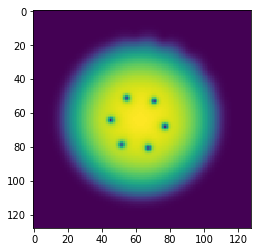

In [196]:
plt.imshow(np.abs(x).T)

In [197]:
rg = np.array([np.real(xrelax), np.imag(xrelax),0*np.real(xrelax)])
rg=rg.T

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


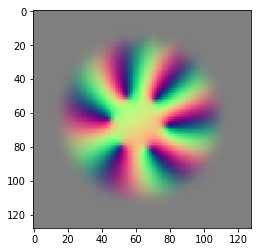

In [198]:
plt.imshow((rg+5000)/10e3)

In [213]:
datafile='data/vortexlattices.hdf5'
    
omegaRlist = [0.1,0.3,0.4,0.5,0.6,0.7,0.8]
vortexlist = [1,2,3,4,5,6,9,20]
stepslist = [500,1000,5000,20000]

allomegas = []
allvortexes = []
allsteps = []
allpsi = []

for o in tqdm(omegaRlist, leave=False):
    for v in tqdm(vortexlist, leave=False):
        for s in tqdm(stepslist, leave=False):
            x = starterpsi(vortexnumber=v)
            gpcore.Setup(DIM, fov, g, 5e-3,  True, 0)
            gpcore.SetHarmonicPotential(omega, 0.0) #omega, epsilon
            Omega = o*omega* np.ones(s)
            gpcore.RotatingFrame(Omega)
            gpcore.Evolve(x,s,100, True, 4e7)
            allpsi.append(x.copy())
            allomegas.append(o)
            allvortexes.append(v)
            allsteps.append(s)

with h5py.File(datafile, 'a') as f:
    dsname = f"vlattice"
    dset = f.create_dataset(dsname, data=np.array(allpsi))
    dset.attrs['o'] = allomegas
    dset.attrs['v'] = allvortexes
    dset.attrs['s'] = allsteps
        


In [214]:
len(allpsi)

224

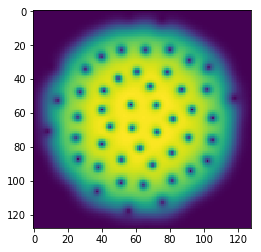

In [232]:
plt.imshow(np.abs(allpsi[220]))

# colormap interpolation

In [6]:
import numpy as np
from matplotlib import cm
from scipy.optimize import curve_fit

def quad(x,a,b,c,d): return d + c*x + b * (x**2) + a * (x**3)

In [7]:
rgb = cm.get_cmap('inferno')
x = np.linspace(0,1,100)
colors = np.array([rgb(xx) for xx in x])

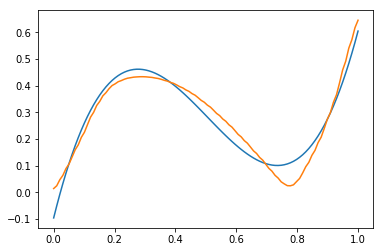

[  7.5327364  -11.43486921   4.60270604  -0.09628023]


In [8]:
channel = 2
f, _  = curve_fit(quad, x, colors[:,channel], [1,1,1,1])
plt.plot(x, quad(x, *f))
plt.plot(x,colors[:,channel])
plt.show()
print(f)

# HDF5

In [35]:
import numpy as np
import h5py


In [36]:
arr = np.random.rand(100,10)

In [37]:
with h5py.File('data/random.hdf5', 'a') as f:
    dset= f.create_dataset("default", data=arr)
    dset.attrs['test'] = arr

In [27]:
with h5py.File('data/random.hdf5', 'a') as f:
    dset= f.create_dataset("default1", data=arr)
    dset.attrs['test'] = 1

In [39]:
with h5py.File("data/random.hdf5", "r") as f:
    data = f['default']
    print(data.attrs['test'][0])
    for key in f.keys():
        print(key)


[0.07073221 0.18006849 0.13877419 0.1811971  0.369533   0.32693269
 0.63765565 0.4217243  0.14765824 0.19217319]
default


In [33]:
with h5py.File("data/random.hdf5", "r") as f:
    data = f['default'][:,1]
    

In [34]:
data

array([0.7858933 , 0.87965748, 0.24594595, 0.38021024, 0.82619913,
       0.88153466, 0.64669606, 0.51645997, 0.61786944, 0.71347704,
       0.47453663, 0.42676964, 0.21184069, 0.97928187, 0.01297011,
       0.02077212, 0.17948574, 0.32876222, 0.12427044, 0.67109227,
       0.06673292, 0.24024072, 0.90133762, 0.29846695, 0.07346949,
       0.24363151, 0.72225246, 0.29026921, 0.19453676, 0.57569686,
       0.83396573, 0.69887963, 0.81429063, 0.80430952, 0.30969732,
       0.68868483, 0.18677031, 0.95117993, 0.70666246, 0.11633369,
       0.63871595, 0.55575362, 0.65986085, 0.5106908 , 0.84684314,
       0.30382152, 0.31996382, 0.78585858, 0.89902282, 0.14420026,
       0.5669585 , 0.37885028, 0.7658143 , 0.85117303, 0.61741277,
       0.76761723, 0.09410375, 0.58322832, 0.68094037, 0.98383185,
       0.18736508, 0.6030691 , 0.44172423, 0.33012646, 0.27532812,
       0.37507284, 0.49574024, 0.16626893, 0.21068883, 0.4051676 ,
       0.10640467, 0.5041243 , 0.93979565, 0.59448023, 0.32786

In [11]:
f.close()